# Sales Analysis

#### Import necessary libraries

In [1]:
import os
import pandas as pd

#### Merge data from each month into one CSV

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path)] 

for file in files:
        print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)
    

#### Read in updated dataframe

In [4]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data
The first step in this is figuring out what we need to clean. Things you need to clean comes as you perform operations and get errors. Based on the error, we can decide how we should go about cleaning the data

##### Drop rows of NAN

In [5]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Get rid of text in order date column

In [7]:
temp_data = all_data[all_data['Order Date'].str[0:2]=='Or']
temp_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add month column

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add month column (alternative method)

In [11]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

C:\Users\Shruti\AppData\Local\Temp\ipykernel_20572\1522122304.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


#### Rearranging the columns

In [23]:
df_reordered = all_data.iloc[:, [0, 1,2,3,7,8,4, 5,6]]  # 'Sr.no', 'Maths Score', 'Name'
print("Reordered Dataset:")
print(df_reordered)

Reordered Dataset:
       Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
2        176559  Bose SoundSport Headphones                 1       99.99   
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
5        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186845   259353      AAA Batteries (4-pack)                 3        2.99   
186846   259354                      iPhone                 1      700.00   
186847   259355                      iPhone                 1      700.00   
186848   259356      34in Ultrawide Monitor                 1      379.99   
186849   259357        USB-C Charging Cable                 1       11.95   

        Month 2   Sales      Order Date  \
0            

#### Add city column

In [26]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,9,8.97,Los Angeles
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,9,700.00,San Francisco
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,9,379.99,San Francisco


In [27]:
# def get_city(address):
#     return address.split(",")[1].strip(" ")

def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA)


## Data Exploration

#### Question 1: What was the best month for sales? How much was earned that month? 

In [13]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,11.99


In [14]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,11.99


In [19]:
all_data.groupby(['Month']).sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,Sales
Month,,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",9709,1822256.73
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",23950,2202022.42
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",45459,2807100.38
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",73116,3390670.24
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",82830,3152606.75
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",81324,2577802.26
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",100051,2647775.76
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",95688,2244467.88
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",104589,2097560.13


In [20]:
results = all_data.groupby(['Month']).sum()['Sales']
results

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

range(1, 13)


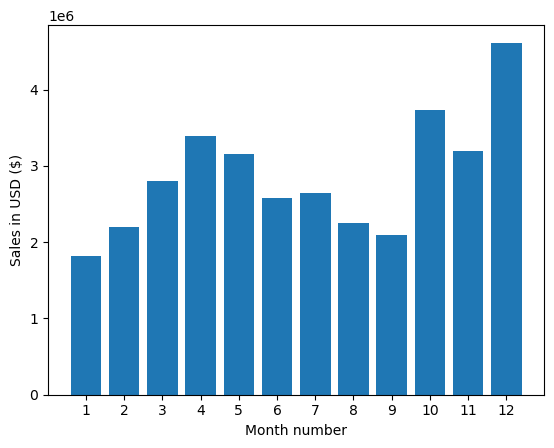

In [22]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,results)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



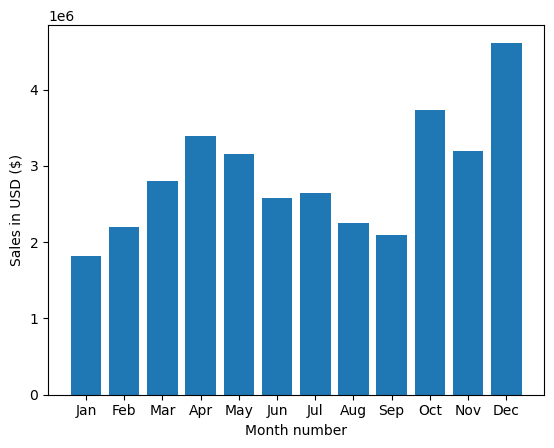

In [25]:
import matplotlib.pyplot as plt
import datetime



# months = range(1,13)
# print(months)
months = [datetime.date(2019, m, 1).strftime('%b') for m in months] 

plt.bar(months,results)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



#### Question 2: What city sold the most product?

In [28]:
all_data.groupby(['City']).sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Sales
City,,,,,,,,,
Atlanta (GA),1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,104794,2795498.58
Austin (TX),1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,69829,1819581.75
Boston (MA),1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,141112,3661642.01
Dallas (TX),1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,104620,2767975.40
Los Angeles (CA),1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,208325,5452570.80
New York City (NY),1765721765751765791765901765991766131766371766...,Apple Airpods HeadphonesAAA Batteries (4-pack)...,27932,4635370.83,04/04/19 20:3004/27/19 00:3004/11/19 10:2304/1...,"149 Dogwood St, New York City, NY 10001433 Hil...",175741,175741,4664317.43
Portland (ME),1767731768791769091770721772301772331772991773...,AAA Batteries (4-pack)Flatscreen TVWired Headp...,2750,447189.25,04/25/19 20:0704/13/19 14:1504/22/19 09:5304/0...,"30 9th St, Portland, ME 04101370 Sunset St, Po...",17144,17144,449758.27
Portland (OR),1765831765931766171766421766461766481766621767...,AAA Batteries (4-pack)Lightning Charging Cable...,11303,1860558.22,04/20/19 12:0004/15/19 13:4504/25/19 08:0304/1...,"146 Jackson St, Portland, OR 97035906 7th St, ...",70621,70621,1870732.34
San Francisco (CA),1765621765651765731765841765861765861765941765...,USB-C Charging CableMacbook Pro LaptopUSB-C Ch...,50239,8211461.74,04/29/19 13:0304/24/19 10:3804/27/19 18:4104/2...,"381 Wilson St, San Francisco, CA 94016915 Will...",315520,315520,8262203.91


In [36]:
res_city = all_data.groupby(['City']).sum()['Sales']
res_city

City
 Atlanta  (GA)          2795498.58
 Austin  (TX)           1819581.75
 Boston  (MA)           3661642.01
 Dallas  (TX)           2767975.40
 Los Angeles  (CA)      5452570.80
 New York City  (NY)    4664317.43
 Portland  (ME)          449758.27
 Portland  (OR)         1870732.34
 San Francisco  (CA)    8262203.91
 Seattle  (WA)          2747755.48
Name: Sales, dtype: float64

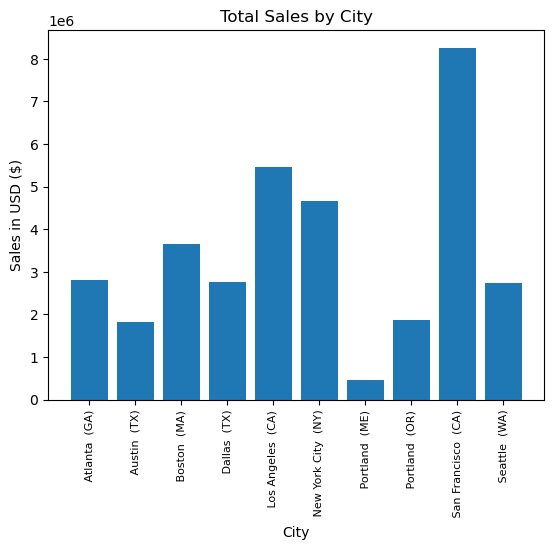

In [40]:
import matplotlib.pyplot as plt
import datetime

# Grouping data and calculating total sales per city
city_data = all_data.groupby('City').sum()['Sales']

# Extracting city names and sales values
cities = city_data.index  # City names
sales = city_data.values  # Corresponding sales values

# Plot
plt.bar(cities, sales)
plt.xticks(rotation='vertical', size=8)  # Rotate city names for better readability
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.title('Total Sales by City')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [ ]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


In [46]:
hours = [hour for hour, df in all_data.groupby('Hour')]

all_data.groupby('Hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Sales,City,Minute,Count
Hour,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


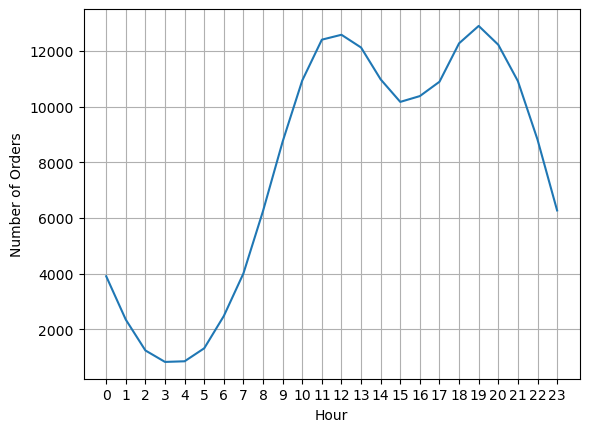

In [50]:
# Create the keys as a 1D list
keys = [pair for pair in all_data.groupby(['Hour']).groups.keys()]

# Plot the data
hourly_counts = all_data.groupby(['Hour']).count()['Count']  # Aggregating data
plt.plot(keys, hourly_counts)  # X-axis: keys, Y-axis: counts
plt.xticks(keys)  # Set the x-ticks to the hours
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


# My recommendation is slightly before 12pm or 7pm

#### Question 4: What products are most often sold together?

In [52]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Sales,City,Hour,Minute,Count
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA),14,38,1
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA),19,42,1
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,4,11.95,Los Angeles (CA),19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,4,99.99,Boston (MA),11,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,9,3.84,Atlanta (GA),20,18,1
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,9,11.99,Atlanta (GA),0,25,1
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,9,5.98,Atlanta (GA),0,25,1
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,9,600.00,San Francisco (CA),13,49,1


In [57]:
# https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

C:\Users\Shruti\AppData\Local\Temp\ipykernel_20572\1362611207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Sales,City,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA),14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,4,11.95,Los Angeles (CA),19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,4,99.99,Boston (MA),11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [56]:
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [59]:
#https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [61]:
# https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3))) #for 3 items

for key,value in count.most_common(10):
    print(key, value)


('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


#### What product sold the most? Why do you think it sold the most?

In [63]:
all_data.groupby('Product').sum()

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Sales,City,Hour,Minute,Count
Product,,,,,,,,,,,,
20in Monitor,1765881766591766731766901767031767101767331767...,4129,451068.99,04/02/19 04:0004/29/19 14:4004/10/19 08:1704/0...,"765 Cherry St, Seattle, WA 98101804 Church St,...",29336,29336,454148.71,Seattle (WA) Dallas (TX) Boston (MA) San F...,58764,122252,4101
27in 4K Gaming Monitor,1765691766001766671767221767231767431767461767...,6244,2429637.70,04/16/19 19:2304/30/19 15:5404/11/19 00:3904/0...,"657 Hill St, Dallas, TX 7500187 West St, Bosto...",44440,44440,2435097.56,Dallas (TX) Boston (MA) Los Angeles (CA) N...,90916,184331,6230
27in FHD Monitor,1765871766231766481766691767351767561767791768...,7550,1125974.93,04/29/19 19:3804/20/19 23:5104/24/19 01:1704/0...,"557 5th St, Los Angeles, CA 90001807 12th St, ...",52558,52558,1132424.50,Los Angeles (CA) Atlanta (GA) Portland (OR...,107540,219948,7507
34in Ultrawide Monitor,1766621766771766851767001767391767541767581767...,6199,2348718.19,04/05/19 12:4604/01/19 11:5004/23/19 22:5304/0...,"678 Hickory St, Portland, OR 97035661 Washingt...",43304,43304,2355558.01,Portland (OR) Austin (TX) New York City (N...,89076,183480,6181
AA Batteries (4-pack),1765701765791766141766221766241766361766421766...,27635,79015.68,04/22/19 15:0904/11/19 10:2304/07/19 21:0104/1...,"186 12th St, Dallas, TX 75001886 Jefferson St,...",145558,145558,106118.40,Dallas (TX) New York City (NY) San Francisc...,298342,609039,20577
AAA Batteries (4-pack),1765751765831765861765981766071766101766251766...,31017,61716.59,04/27/19 00:3004/20/19 12:0004/10/19 17:0004/2...,"433 Hill St, New York City, NY 10001146 Jackso...",146370,146370,92740.83,New York City (NY) Portland (OR) San Franci...,297332,612113,20641
Apple Airpods Headphones,1765721765761765771765781765911765961766091766...,15661,2332350.00,04/04/19 20:3004/28/19 11:4204/04/19 19:2504/0...,"149 Dogwood St, New York City, NY 10001771 Rid...",109477,109477,2349150.00,New York City (NY) Los Angeles (CA) Dallas ...,223304,455570,15549
Bose SoundSport Headphones,1765591765631765821765851765851766111766261766...,13457,1332366.75,04/07/19 22:3004/02/19 07:4604/27/19 12:2004/0...,"682 Chestnut St, Boston, MA 02215668 Center St...",94113,94113,1345565.43,Boston (MA) Seattle (WA) Atlanta (GA) Bost...,192445,392603,13325
Flatscreen TV,1765841766191766881767111767191767481768791768...,4819,1440000.00,04/24/19 20:3904/16/19 18:3704/20/19 18:2504/3...,"936 Church St, San Francisco, CA 94016116 Nort...",34224,34224,1445700.00,San Francisco (CA) Los Angeles (CA) San Fra...,68815,142789,4800


In [65]:
all_data.groupby('Product').sum()['Quantity Ordered']

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

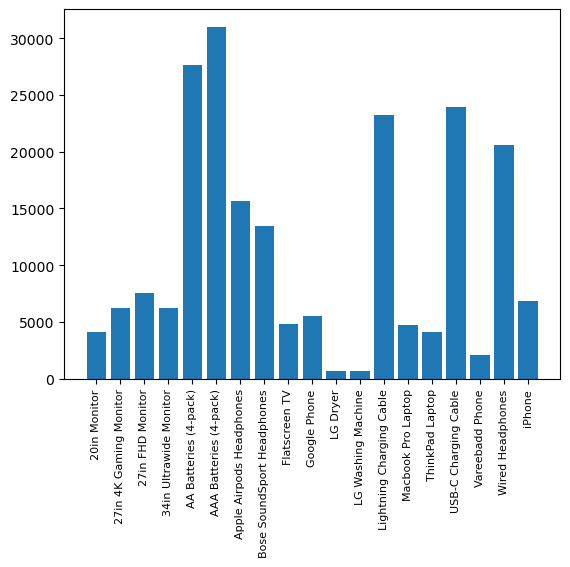

In [66]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


# the items sold the most could be cheaper than the least selling ones

In [75]:
prices = all_data.groupby('Product')['Price Each'].mean()
print(prices)


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\Shruti\AppData\Local\Temp\ipykernel_20572\1257371024.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\Shruti\AppData\Local\Temp\ipykernel_20572\1257371024.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


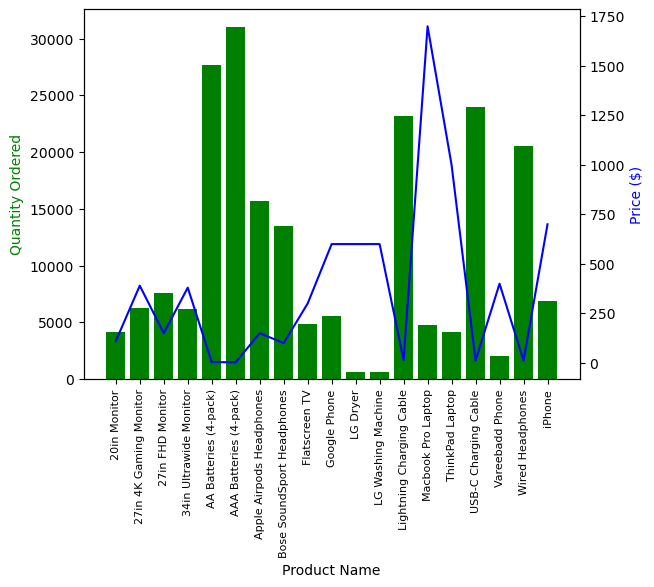

In [77]:
# https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

# prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()


#with the graph we can understand teh correlation between the products, quantities and prices